# Energy Budgets
Take a closer look at the energy budgets of our models

In [1]:
import os
import subprocess

import numpy as np
from scipy.interpolate import splev
import astropy.units as u
import matplotlib.pyplot as plt

import synthesizAR
from synthesizAR.util import InputHandler, OutputHandler
from synthesizAR.instruments import InstrumentSDOAIA

%matplotlib inline

## High Frequency

In [2]:
field_high = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/field_checkpoint/')

In [3]:
max_energy = np.zeros((len(field_high.loops),))
total_energy = np.zeros((len(field_high.loops),))
event_ratios_high = []
for i,loop in enumerate(field_high.loops):
    events = InputHandler(
        f'/storage-home/w/wtb2/data/timelag_synthesis_v2/high_frequency/hydro_config/{loop.name}.xml',
        input_vars=['heating']).lookup_vars()['heating']['events']
    total_energy[i] = np.array([e['event']['magnitude'] for e in events]).sum() * 200. / 2.
    max_energy[i] = ((0.3 * loop.field_strength.mean().value)**2)/(8.*np.pi)
    event_ratios_high += ((np.array([e['event']['magnitude'] for e in events]) * 200. / 2.) / 
                          (((0.3 * loop.field_strength.max().value)**2)/(8.*np.pi))).tolist()
event_ratios_high = np.array(event_ratios_high)

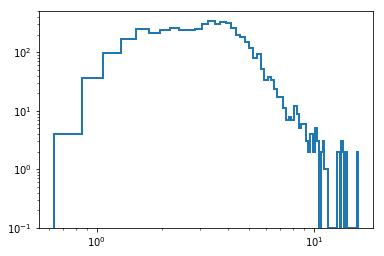

In [4]:
ratio_high = total_energy / max_energy
plt.hist(ratio_high, histtype='step', lw=2, bins='fd',log=True);
plt.xscale('log')

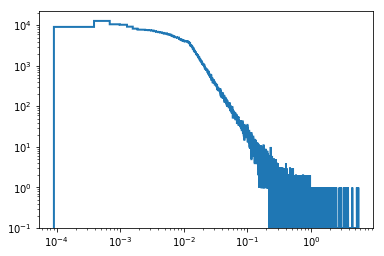

In [5]:
plt.hist(event_ratios_high, histtype='step', lw=2, bins='fd',log=True);
plt.xscale('log')

In [6]:
len(event_ratios_high)

357961

## Intermediate Frequency

In [7]:
field_intermediate = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/field_checkpoint/')

In [8]:
max_energy = np.zeros((len(field_intermediate.loops),))
total_energy = np.zeros((len(field_intermediate.loops),))
event_ratios_intermediate = []
for i,loop in enumerate(field_intermediate.loops):
    events = InputHandler(
        f'/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/hydro_config/{loop.name}.xml',
        input_vars=['heating']).lookup_vars()['heating']['events']
    if type(events) is not list:
        events = [events]
    total_energy[i] = np.array([e['event']['magnitude'] for e in events]).sum() * 200. / 2.
    max_energy[i] = ((0.3 * loop.field_strength.mean().value)**2)/(8.*np.pi)
    event_ratios_intermediate += ((np.array([e['event']['magnitude'] for e in events]) * 200. / 2.) / 
                                  (((0.3 * loop.field_strength.max().value)**2)/(8.*np.pi))).tolist()
event_ratios_intermediate = np.array(event_ratios_intermediate)

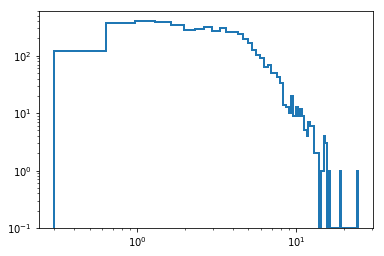

In [9]:
ratio_intermediate = total_energy / max_energy
plt.hist(ratio_intermediate, histtype='step', lw=2, bins='fd',log=True);
plt.xscale('log')

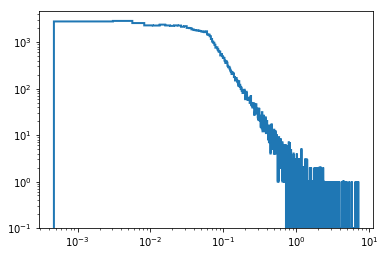

In [10]:
plt.hist(event_ratios_intermediate, histtype='step', lw=2, bins='fd',log=True);
plt.xscale('log')

In [11]:
len(event_ratios_intermediate)

73028

## Low Frequency

In [12]:
field_low = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/field_checkpoint/')

In [13]:
max_energy = np.zeros((len(field_low.loops),))
total_energy = np.zeros((len(field_low.loops),))
event_ratios_low = []
for i,loop in enumerate(field_low.loops):
    events = InputHandler(
        f'/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/hydro_config/{loop.name}.xml',
        input_vars=['heating']).lookup_vars()['heating']['events']
    if type(events) is not list:
        events = [events]
    total_energy[i] = np.array([e['event']['magnitude'] for e in events]).sum() * 200. / 2.
    max_energy[i] = ((0.3 * loop.field_strength.mean().value)**2)/(8.*np.pi)
    event_ratios_low += ((np.array([e['event']['magnitude'] for e in events]) * 200. / 2.) / 
                                  (((0.3 * loop.field_strength.mean().value)**2)/(8.*np.pi))).tolist()
event_ratios_low = np.array(event_ratios_low)

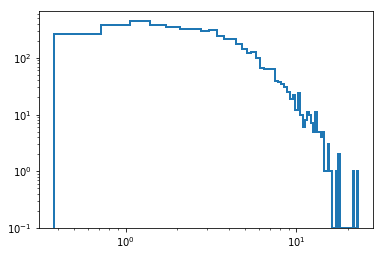

In [14]:
ratio_low = total_energy / max_energy
plt.hist(ratio_low, histtype='step', lw=2, bins='fd',log=True);
plt.xscale('log')

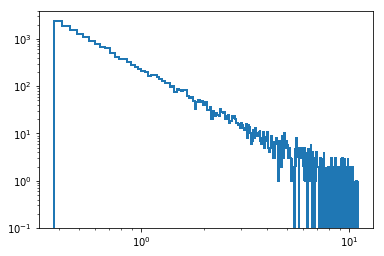

In [15]:
plt.hist(event_ratios_low, histtype='step', lw=2, bins='fd',log=True);
plt.xscale('log')

In [20]:
len(event_ratios_low)

18127

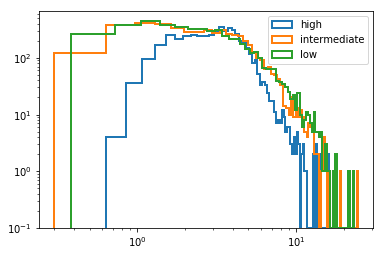

In [16]:
plt.hist(ratio_high, histtype='step', lw=2, bins='fd',log=True,label='high');
plt.hist(ratio_intermediate, histtype='step', lw=2, bins='fd',log=True,label='intermediate');
plt.hist(ratio_low, histtype='step', lw=2, bins='fd',log=True,label='low');
plt.xscale('log')
plt.legend()

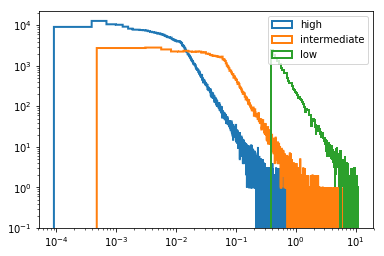

In [17]:
plt.hist(event_ratios_high, histtype='step', lw=2, bins='fd',log=True,label='high');
plt.hist(event_ratios_intermediate, histtype='step', lw=2, bins='fd',log=True,label='intermediate');
plt.hist(event_ratios_low, histtype='step', lw=2, bins='fd',log=True,label='low');
plt.xscale('log')
plt.legend(loc=1)

In [18]:
mean_rates = []
max_rates = []
for loop in field_high.loops:
    mean_rates.append(((0.3 * loop.field_strength.mean().value)**2)/(8.*np.pi) * loop.full_length.to(u.cm).value * 1e14)
    max_rates.append(((0.3 * loop.field_strength.max().value)**2)/(8.*np.pi) * loop.full_length.to(u.cm).value * 1e14)
mean_rates = np.array(mean_rates)# * 2. / 200.
max_rates = np.array(max_rates) #* 2. / 200.

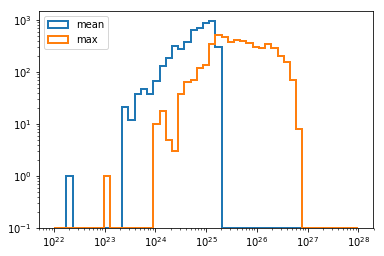

In [19]:
bins = np.logspace(22,28,50)
plt.hist(mean_rates, histtype='step', lw=2, bins=bins,log=True,label='mean');
plt.hist(max_rates, histtype='step', lw=2, bins=bins,log=True,label='max');
plt.xscale('log')
plt.legend(loc=2)

## Sample EBTEL Run

In [548]:
def calculate_intensity(config_dict):
    aia = InstrumentSDOAIA([0,1]*u.s,)
    results = np.loadtxt(config_dict['output_filename'])
    Te = results[:,1] * u.K
    n = results[:,3] * u.cm**(-3)
    counts = {}
    for channel in aia.channels:
        response_function = splev(Te, channel['temperature_response_spline']) * u.count * u.cm**5 / u.s / u.pixel
        counts[channel['name']] = (n**2) * response_function * (config_dict['loop_length'] * u.cm)
    return counts

In [549]:
def calculate_timelag(I_a, I_b, time):
    delta_t = np.diff(time).cumsum()
    timelags = np.hstack([-delta_t[::-1], np.array([0]), delta_t])
    I_a = (I_a - I_a.mean()) / I_a.std()
    I_b = (I_b - I_b.mean()) / I_b.std()
    return timelags, np.fft.irfft(np.fft.rfft(I_a[::-1], n=timelags.shape[0]) * np.fft.rfft(I_b, n=timelags.shape[0]), n=timelags.shape[0])

In [550]:
channel_pairs = [(94,335), (94,171), (335,211), (335,171), (193,171), (171,131)]

In [551]:
duration = 200.0
ih = synthesizAR.util.InputHandler('/storage-home/w/wtb2/codes/ebtelPlusPlus/config/ebtel.example.cfg.xml')
base_config = ih.lookup_vars()
base_config['c1_cond0'] = 6.0
base_config['total_time'] = 1e4
base_config['use_adaptive_solver'] = True
base_config['adaptive_solver_error'] = 1e-8
base_config['use_flux_limiting'] = True
base_config['saturation_limit'] = 1.#/6.
base_config['calculate_dem'] = False
base_config['heating']['partition'] = 1.0
base_config['heating']['background'] = 1e-6
base_config['force_single_fluid'] = False
base_config['tau_max'] = 200.0
base_config['output_filename'] = 'test'

(0, 100)

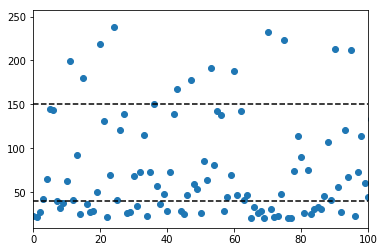

In [552]:
plt.plot([l.full_length.to(u.Mm).value for l in field_high.loops],'o')
plt.axhline(y=150,ls='--',color='k')
plt.axhline(y=40,ls='--',color='k')
plt.xlim(0,100)

### Shorter Loop

In [553]:
test_loop = field_high.loops[25]
print(test_loop)
base_config['loop_length'] = test_loop.full_length.to(u.cm).value/2.

Name : loop000025
Loop full-length, 2L : 41.644 Mm
Footpoints : (6.27e+10,-2.13e+10,-2.22e+10),(6.35e+10,-1.79e+10,-2.23e+10) cm
Maximum field strength : 187.31 G


#### Lower Energy

In [554]:
base_config['heating']['events'] = [
    {'event': {'magnitude': ((0.3 * test_loop.field_strength.mean().value)**2)/(8.*np.pi)/(duration/2.), 
               'rise_start':0., 'rise_end': duration/2., 'decay_start':duration/2., 'decay_end':duration }}
]

In [555]:
oh = synthesizAR.util.OutputHandler(base_config['output_filename']+'.xml', base_config,)
oh.print_to_xml()
r = subprocess.run(['/storage-home/w/wtb2/codes/ebtelPlusPlus/bin/ebtel++.run', '-c', oh.output_filename],)
print(r.stdout)
print(r.stderr)
mean_energy_results = np.loadtxt(base_config['output_filename'])
mean_intensities = calculate_intensity(base_config)

None
None


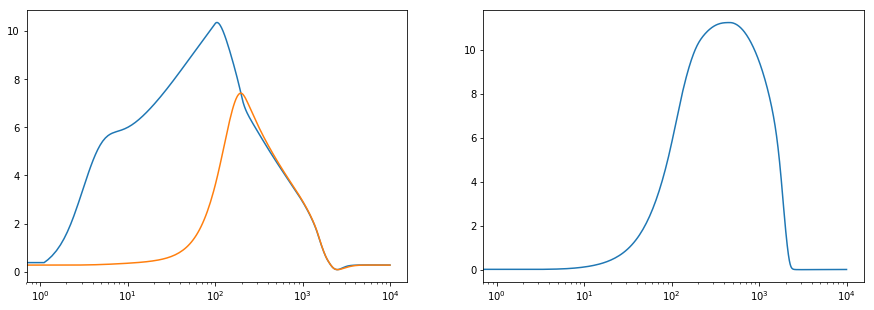

In [556]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(mean_energy_results[:,0],mean_energy_results[:,1]/1e6)
plt.plot(mean_energy_results[:,0],mean_energy_results[:,2]/1e6)
plt.xscale('log')
plt.subplot(122)
plt.plot(mean_energy_results[:,0],mean_energy_results[:,3]/1e9)
plt.xscale('log')

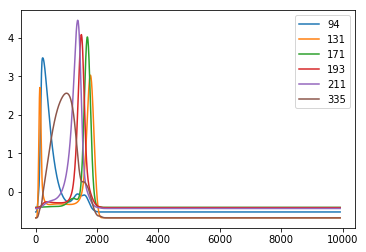

In [564]:
for c in mean_intensities:
    plt.plot(mean_energy_results[:,0],
             (mean_intensities[c] - mean_intensities[c].mean())/mean_intensities[c].std(),#/mean_intensities[c].max(),
             label=c)
plt.legend()

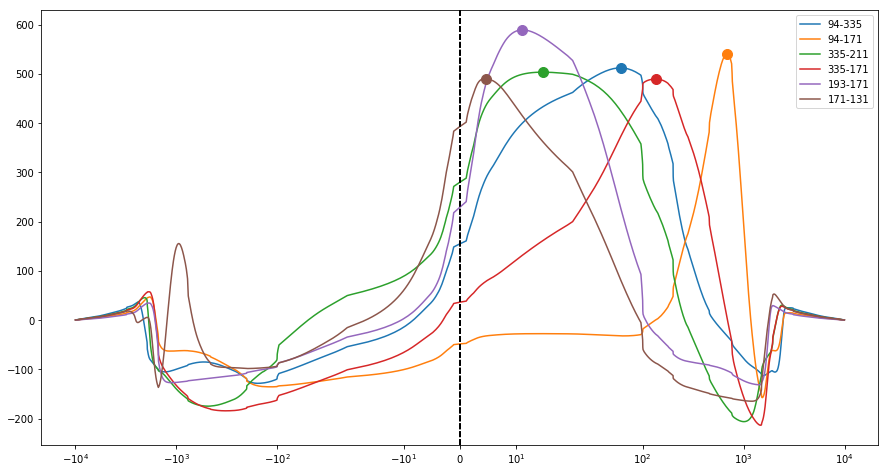

In [565]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
for i,cp in enumerate(channel_pairs):
    tl, cc = calculate_timelag(mean_intensities[f'{cp[0]}'], mean_intensities[f'{cp[1]}'], mean_energy_results[:,0])
    ax.plot(tl,cc,color=f'C{i}',label='{}-{}'.format(*cp))
    ax.plot(tl[np.argmax(cc)],cc.max(),'o',color=f'C{i}',markersize=10)
    ax.axvline(x=0,ls='--',color='k')
ax.set_xlim(
    -(6*u.hour).to(u.s).value,(6*u.hour).to(u.s).value)
ax.set_xscale('symlog',linthreshx=20)
ax.legend()

#### Higher Energy

In [566]:
base_config['heating']['events'] = [
    {'event': {'magnitude': ((0.3 * test_loop.field_strength.max().value)**2)/(8.*np.pi)/(duration/2.), 
               'rise_start':0., 'rise_end': duration/2., 'decay_start':duration/2., 'decay_end':duration }}
]

In [567]:
oh = synthesizAR.util.OutputHandler(base_config['output_filename']+'.xml', base_config,)
oh.print_to_xml()
subprocess.run(['/storage-home/w/wtb2/codes/ebtelPlusPlus/bin/ebtel++.run', '-c', oh.output_filename])
max_energy_results = np.loadtxt(base_config['output_filename'])
max_intensities = calculate_intensity(base_config)

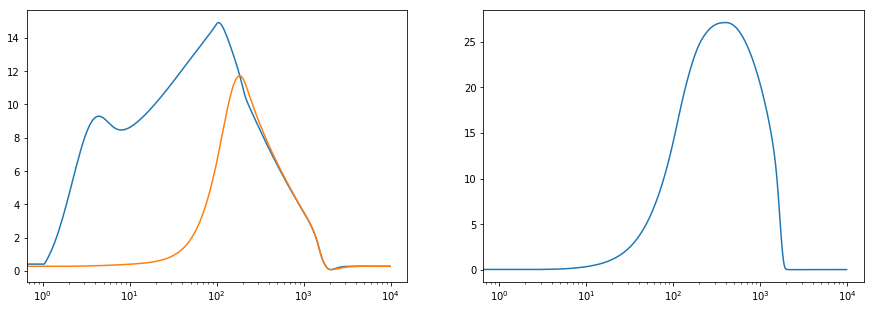

In [568]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(max_energy_results[:,0],max_energy_results[:,1]/1e6)
plt.plot(max_energy_results[:,0],max_energy_results[:,2]/1e6)
plt.xscale('log')
plt.subplot(122)
plt.plot(max_energy_results[:,0],max_energy_results[:,3]/1e9)
plt.xscale('log')

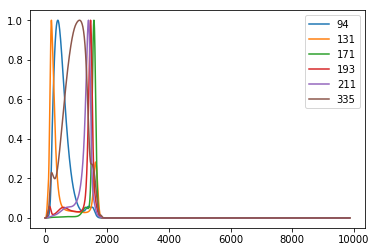

In [569]:
for c in mean_intensities:
    plt.plot(max_energy_results[:,0], max_intensities[c]/max_intensities[c].max(), label=c)
plt.legend()

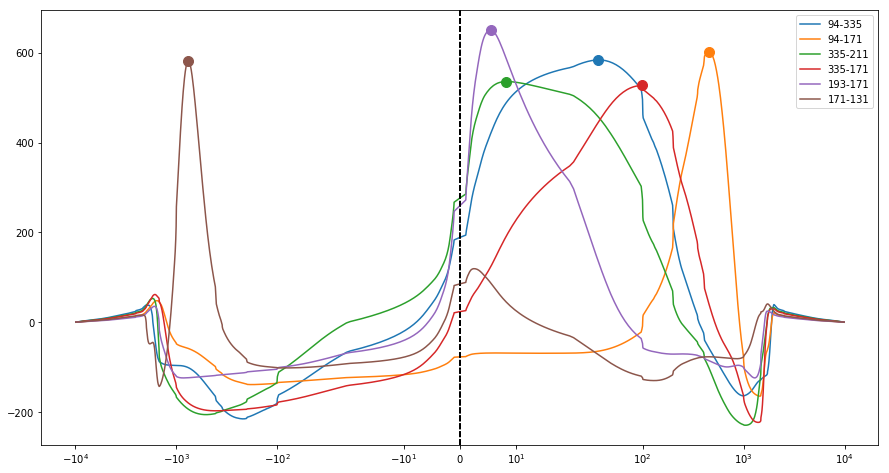

In [570]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
for i,cp in enumerate(channel_pairs):
    tl, cc = calculate_timelag(max_intensities[f'{cp[0]}'], max_intensities[f'{cp[1]}'], max_energy_results[:,0])
    ax.plot(tl,cc,color=f'C{i}',label='{}-{}'.format(*cp))
    ax.plot(tl[np.argmax(cc)],cc.max(),'o',color=f'C{i}',markersize=10)
    ax.axvline(x=0,ls='--',color='k')
ax.set_xlim(
    -(6*u.hour).to(u.s).value,(6*u.hour).to(u.s).value)
ax.set_xscale('symlog',linthreshx=20)
ax.legend()

Percent diff timelag 94-335 = 0.5108793852173598
Percent diff timelag 94-171 = 0.3996800587568349
Percent diff timelag 335-211 = 0.5721967902781037
Percent diff timelag 335-171 = 0.31580826366475184
Percent diff timelag 193-171 = 0.6824610726436847
Percent diff timelag 171-131 = -2.0242137909809306


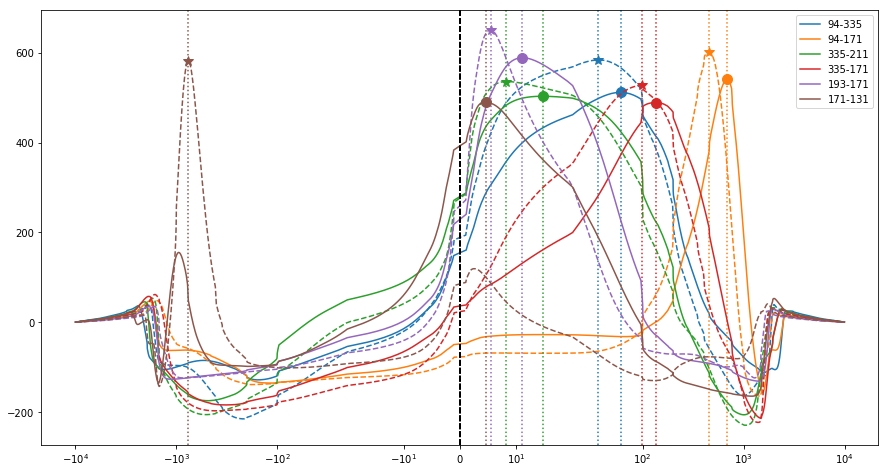

In [572]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
for i,cp in enumerate(channel_pairs):
    # Mean
    tl, cc = calculate_timelag(mean_intensities[f'{cp[0]}'], mean_intensities[f'{cp[1]}'], mean_energy_results[:,0])
    ax.plot(tl,cc,color=f'C{i}',label='{}-{}'.format(*cp))
    mean_tl = tl[np.argmax(cc)]
    ax.plot(mean_tl,cc.max(),'o',color=f'C{i}',markersize=10)
    ax.axvline(x=tl[np.argmax(cc)], color=f'C{i}',ls=':')
    # Max
    tl, cc = calculate_timelag(max_intensities[f'{cp[0]}'], max_intensities[f'{cp[1]}'], max_energy_results[:,0])
    ax.plot(tl,cc,color=f'C{i}',ls='--')
    max_tl = tl[np.argmax(cc)]
    ax.plot(max_tl,cc.max(),'*',color=f'C{i}',markersize=10)
    ax.axvline(x=tl[np.argmax(cc)], color=f'C{i}',ls=':')
    ax.axvline(x=0,ls='--',color='k')
    print(f'Percent diff timelag {cp[0]}-{cp[1]} = {np.fabs(mean_tl - max_tl)/(0.5*(mean_tl + max_tl))}')
ax.set_xlim(
    -(6*u.hour).to(u.s).value,(6*u.hour).to(u.s).value)
ax.set_xscale('symlog',linthreshx=20)
ax.legend()

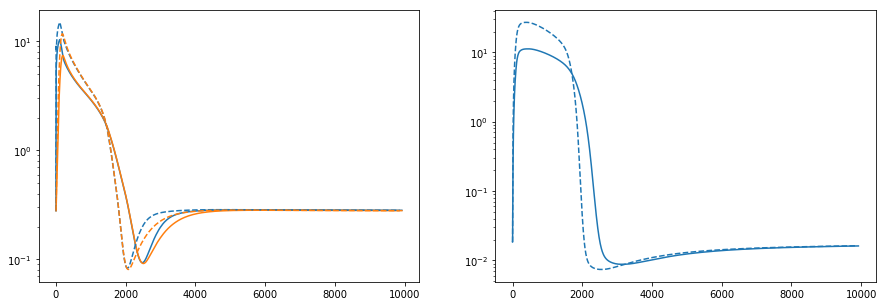

In [573]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(mean_energy_results[:,0],mean_energy_results[:,1]/1e6,color='C0',ls='-')
plt.plot(mean_energy_results[:,0],mean_energy_results[:,2]/1e6,color='C1',ls='-')
plt.plot(max_energy_results[:,0],max_energy_results[:,1]/1e6,color='C0',ls='--')
plt.plot(max_energy_results[:,0],max_energy_results[:,2]/1e6,color='C1',ls='--')
#plt.xscale('log')
plt.yscale('log')
plt.subplot(122)
plt.plot(mean_energy_results[:,0],mean_energy_results[:,3]/1e9,color='C0',ls='-')
plt.plot(max_energy_results[:,0],max_energy_results[:,3]/1e9,color='C0',ls='--')
#plt.xscale('log')
plt.yscale('log')

### Longer Loop

In [574]:
test_loop = field_high.loops[36]
print(test_loop)
base_config['loop_length'] = test_loop.full_length.to(u.cm).value/2.

Name : loop000036
Loop full-length, 2L : 150.999 Mm
Footpoints : (6.22e+10,-2.25e+10,-2.24e+10),(6.39e+10,-1.65e+10,-2.25e+10) cm
Maximum field strength : 229.14 G


#### Lower Energy

In [575]:
base_config['heating']['events'] = [
    {'event': {
        'magnitude': ((0.3 * test_loop.field_strength.mean().value)**2)/(8.*np.pi)/(duration/2.), 
        'rise_start':0., 'rise_end': duration/2., 'decay_start':duration/2., 'decay_end':duration }}
]

In [576]:
oh = synthesizAR.util.OutputHandler(base_config['output_filename']+'.xml', base_config,)
oh.print_to_xml()
r = subprocess.run(['/storage-home/w/wtb2/codes/ebtelPlusPlus/bin/ebtel++.run', '-c', oh.output_filename],)
print(r.stdout)
print(r.stderr)
mean_energy_results = np.loadtxt(base_config['output_filename'])
mean_intensities = calculate_intensity(base_config)

None
None


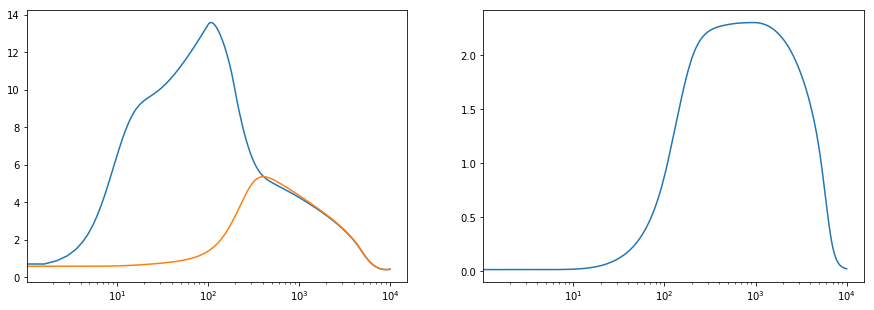

In [577]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(mean_energy_results[:,0],mean_energy_results[:,1]/1e6)
plt.plot(mean_energy_results[:,0],mean_energy_results[:,2]/1e6)
plt.xscale('log')
plt.subplot(122)
plt.plot(mean_energy_results[:,0],mean_energy_results[:,3]/1e9)
plt.xscale('log')

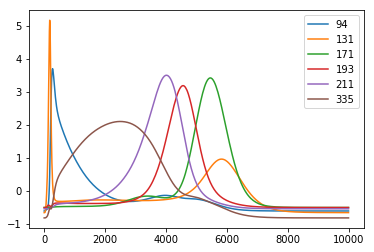

In [578]:
for c in mean_intensities:
    plt.plot(mean_energy_results[:,0],
             (mean_intensities[c] - mean_intensities[c].mean())/mean_intensities[c].std(),#/mean_intensities[c].max(),
             label=c)
plt.legend()

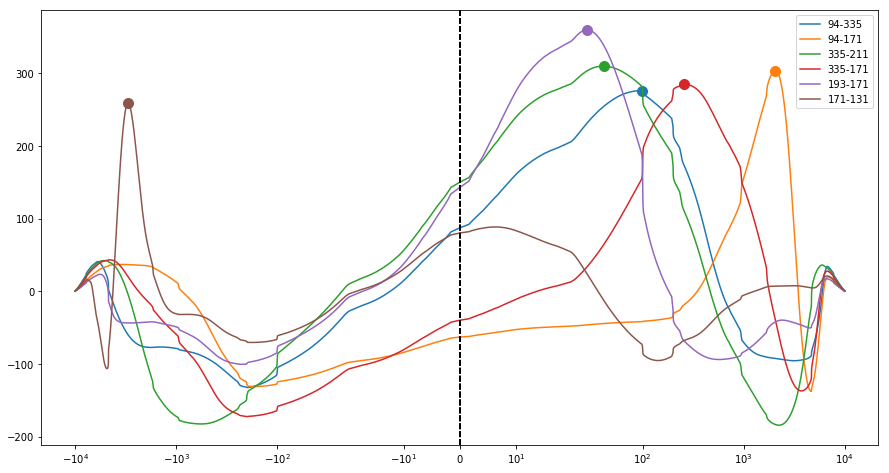

In [579]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
for i,cp in enumerate(channel_pairs):
    tl, cc = calculate_timelag(mean_intensities[f'{cp[0]}'], mean_intensities[f'{cp[1]}'], mean_energy_results[:,0])
    ax.plot(tl,cc,color=f'C{i}',label='{}-{}'.format(*cp))
    ax.plot(tl[np.argmax(cc)],cc.max(),'o',color=f'C{i}',markersize=10)
    ax.axvline(x=0,ls='--',color='k')
ax.set_xlim(
    -(6*u.hour).to(u.s).value,(6*u.hour).to(u.s).value)
ax.set_xscale('symlog',linthreshx=20)
ax.legend()

#### Higher Energy

In [580]:
base_config['heating']['events'] = [
    {'event': {'magnitude': ((0.3 * test_loop.field_strength.max().value)**2)/(8.*np.pi)/(duration/2.), 
               'rise_start':0., 'rise_end': duration/2., 'decay_start':duration/2., 'decay_end':duration }}
]

In [581]:
oh = synthesizAR.util.OutputHandler(base_config['output_filename']+'.xml', base_config,)
oh.print_to_xml()
subprocess.run(['/storage-home/w/wtb2/codes/ebtelPlusPlus/bin/ebtel++.run', '-c', oh.output_filename])
max_energy_results = np.loadtxt(base_config['output_filename'])
max_intensities = calculate_intensity(base_config)

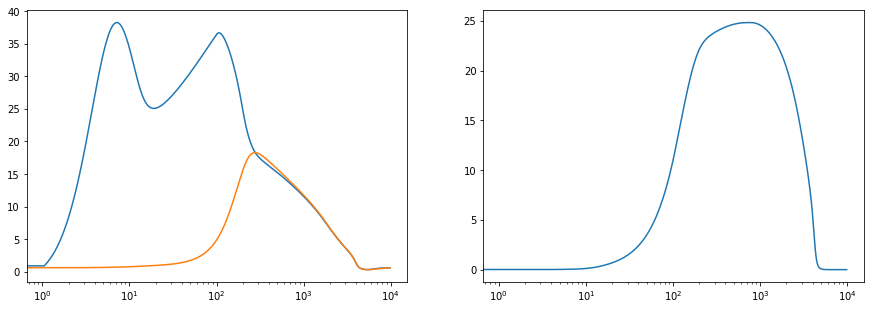

In [582]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(max_energy_results[:,0],max_energy_results[:,1]/1e6)
plt.plot(max_energy_results[:,0],max_energy_results[:,2]/1e6)
plt.xscale('log')
plt.subplot(122)
plt.plot(max_energy_results[:,0],max_energy_results[:,3]/1e9)
plt.xscale('log')

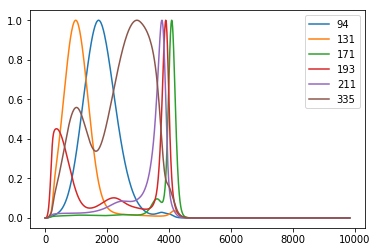

In [583]:
for c in mean_intensities:
    plt.plot(max_energy_results[:,0], max_intensities[c]/max_intensities[c].max(), label=c)
plt.legend()

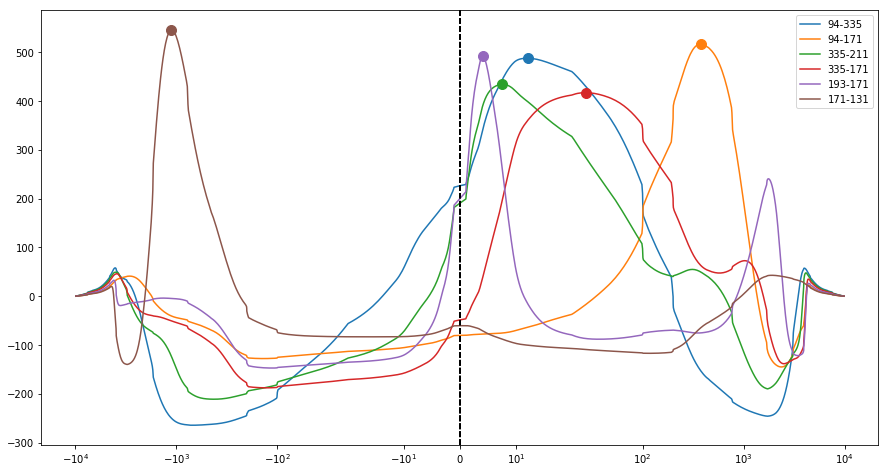

In [584]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
for i,cp in enumerate(channel_pairs):
    tl, cc = calculate_timelag(max_intensities[f'{cp[0]}'], max_intensities[f'{cp[1]}'], max_energy_results[:,0])
    ax.plot(tl,cc,color=f'C{i}',label='{}-{}'.format(*cp))
    ax.plot(tl[np.argmax(cc)],cc.max(),'o',color=f'C{i}',markersize=10)
    ax.axvline(x=0,ls='--',color='k')
ax.set_xlim(
    -(6*u.hour).to(u.s).value,(6*u.hour).to(u.s).value)
ax.set_xscale('symlog',linthreshx=20)
ax.legend()

Percent diff timelag 94-335 = 1.5590726253099145
Percent diff timelag 94-171 = 1.3776045506154122
Percent diff timelag 335-211 = 1.3812714974973124
Percent diff timelag 335-171 = 1.6127676287602455
Percent diff timelag 193-171 = 1.4902152305763996
Percent diff timelag 171-131 = -0.9126419817325949


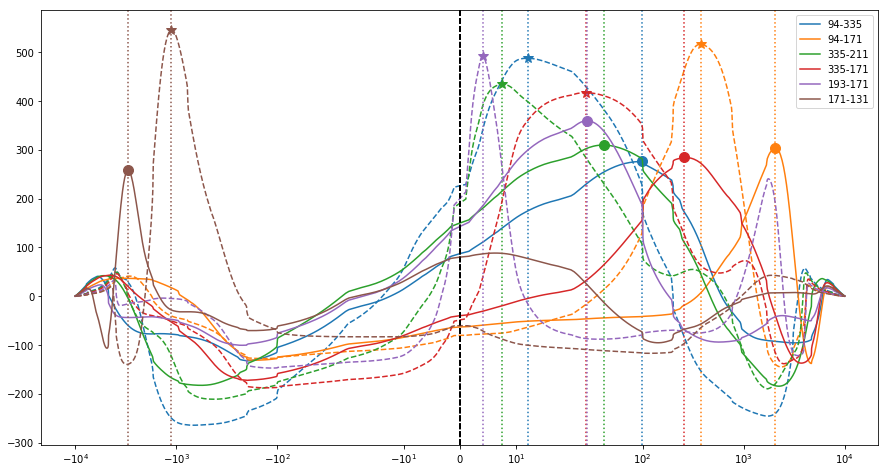

In [585]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
for i,cp in enumerate(channel_pairs):
    # Mean
    tl, cc = calculate_timelag(mean_intensities[f'{cp[0]}'], mean_intensities[f'{cp[1]}'], mean_energy_results[:,0])
    ax.plot(tl,cc,color=f'C{i}',label='{}-{}'.format(*cp))
    mean_tl = tl[np.argmax(cc)]
    ax.plot(mean_tl,cc.max(),'o',color=f'C{i}',markersize=10)
    ax.axvline(x=tl[np.argmax(cc)], color=f'C{i}',ls=':')
    # Max
    tl, cc = calculate_timelag(max_intensities[f'{cp[0]}'], max_intensities[f'{cp[1]}'], max_energy_results[:,0])
    ax.plot(tl,cc,color=f'C{i}',ls='--')
    max_tl = tl[np.argmax(cc)]
    ax.plot(max_tl,cc.max(),'*',color=f'C{i}',markersize=10)
    ax.axvline(x=tl[np.argmax(cc)], color=f'C{i}',ls=':')
    ax.axvline(x=0,ls='--',color='k')
    print(f'Percent diff timelag {cp[0]}-{cp[1]} = {np.fabs(mean_tl - max_tl)/(0.5*(mean_tl + max_tl))}')
ax.set_xlim(
    -(6*u.hour).to(u.s).value,(6*u.hour).to(u.s).value)
ax.set_xscale('symlog',linthreshx=20)
ax.legend()

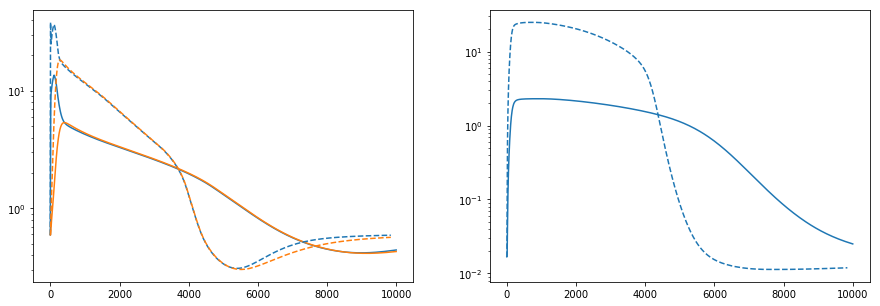

In [586]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(mean_energy_results[:,0],mean_energy_results[:,1]/1e6,color='C0',ls='-')
plt.plot(mean_energy_results[:,0],mean_energy_results[:,2]/1e6,color='C1',ls='-')
plt.plot(max_energy_results[:,0],max_energy_results[:,1]/1e6,color='C0',ls='--')
plt.plot(max_energy_results[:,0],max_energy_results[:,2]/1e6,color='C1',ls='--')
#plt.xscale('log')
plt.yscale('log')
plt.subplot(122)
plt.plot(mean_energy_results[:,0],mean_energy_results[:,3]/1e9,color='C0',ls='-')
plt.plot(max_energy_results[:,0],max_energy_results[:,3]/1e9,color='C0',ls='--')
#plt.xscale('log')
plt.yscale('log')